In [23]:
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [24]:
(xtr,ytr),(xte,yte)=cifar10.load_data()

In [25]:
xtr.shape

(50000, 32, 32, 3)

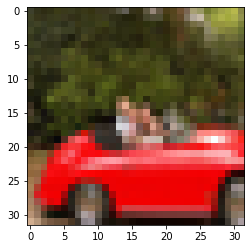

In [26]:
plt.imshow(xtr[99], cmap='gray')

In [27]:
ytr[99]

array([1], dtype=uint8)

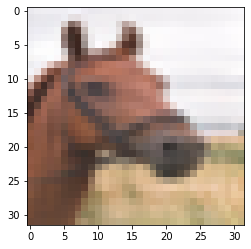

In [28]:
plt.imshow(xte[99], cmap='gray')

In [29]:
yte[99]

array([7], dtype=uint8)

In [30]:
ytr=tcg(ytr)
yte=tcg(yte)

In [31]:
xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],3).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],3).astype('float32')/255

In [32]:
model = Sequential([
  Flatten(input_shape=(32, 32, 3)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [33]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [34]:
history = model.fit(xtr,ytr, validation_data=(xte,yte),epochs=13, batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/13
50000/50000 [==============================] - 34s 675us/sample - loss: 1.8907 - accuracy: 0.3142 - val_loss: 1.7221 - val_accuracy: 0.3813
Epoch 2/13
50000/50000 [==============================] - 19s 379us/sample - loss: 1.6887 - accuracy: 0.3948 - val_loss: 1.6159 - val_accuracy: 0.4249
Epoch 3/13
50000/50000 [==============================] - 19s 375us/sample - loss: 1.6032 - accuracy: 0.4282 - val_loss: 1.5745 - val_accuracy: 0.4449
Epoch 4/13
50000/50000 [==============================] - 19s 376us/sample - loss: 1.5481 - accuracy: 0.4461 - val_loss: 1.5294 - val_accuracy: 0.4542
Epoch 5/13
50000/50000 [==============================] - 19s 370us/sample - loss: 1.5052 - accuracy: 0.4628 - val_loss: 1.5223 - val_accuracy: 0.4542
Epoch 6/13
50000/50000 [==============================] - 19s 373us/sample - loss: 1.4715 - accuracy: 0.4745 - val_loss: 1.4971 - val_accuracy: 0.4709
Epoch 7/13
50000/50000 [====================

In [35]:
model.evaluate(xtr,ytr)

50000/50000 [==============================] - 16s 320us/sample - loss: 1.3503 - accuracy: 0.5195


[1.3503036310958862, 0.51954]

In [36]:
score = model.evaluate(xte,yte)

10000/10000 [==============================] - 3s 271us/sample - loss: 1.4894 - accuracy: 0.4776


In [37]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4893764204025268
Test accuracy: 0.4776


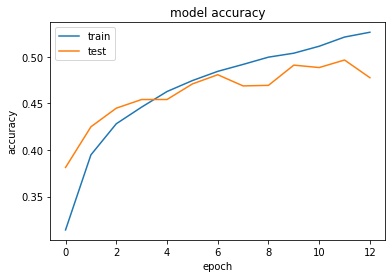

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

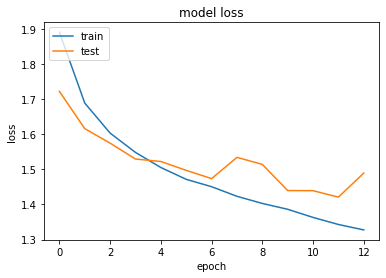

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()